<a href="https://colab.research.google.com/github/AlvaroUriel/idal_ia3/blob/main/Test_listar_dataset_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Analisis previo dataset


In [2]:
from  google.colab import drive
 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import os
import numpy as np
import pandas as pd

In [4]:
train_path = '/content/drive/MyDrive/IA3/Datasets/Food-11/training'
test_path   ='/content/drive/MyDrive/IA3/Datasets/Food-11/evaluation'
val_path   = '/content/drive/MyDrive/IA3/Datasets/Food-11/validation'

In [5]:
class_names = ['Bread', 'Dairy product', 'Dessert', 'Egg', 'Fried food',
               'Meat', 'Noodles/Pasta', 'Rice', 'Seafood', 'Soup', 'Vegetable/Fruit']
class_names

['Bread',
 'Dairy product',
 'Dessert',
 'Egg',
 'Fried food',
 'Meat',
 'Noodles/Pasta',
 'Rice',
 'Seafood',
 'Soup',
 'Vegetable/Fruit']

In [6]:
#Creamos listas con todos los nombres de los ficheros 
train_files = [os.path.join(train_path,img) for img in os.listdir(train_path)]
test_files  = [os.path.join(test_path,img)  for img in os.listdir(test_path)]
val_files   = [os.path.join(val_path,img)   for img in os.listdir(val_path)]

In [7]:
#Observamos como estan nombrados los ficheros
print(train_files[0])
print(test_files[0])
print(val_files[0])

/content/drive/MyDrive/IA3/Datasets/Food-11/training/0_869.jpg
/content/drive/MyDrive/IA3/Datasets/Food-11/evaluation/9_242.jpg
/content/drive/MyDrive/IA3/Datasets/Food-11/validation/9_213.jpg


In [8]:
#Creamos listas con la clase del fichero, para cada fichero
train_y = [int(img.split("/")[-1].split("_")[0]) for img in train_files]
test_y  = [int(img.split("/")[-1].split("_")[0]) for img in test_files]
val_y   = [int(img.split("/")[-1].split("_")[0]) for img in val_files]


In [9]:
#Creamos un diccionario para unir las rutas y su clase
d_train_y = {'Rutas':train_files,'Clases':train_y}
d_test_y  = {'Rutas':test_files, 'Clases':test_y}
d_val_y   = {'Rutas':val_files,  'Clases':val_y}

In [10]:
#Convertimos el diccionario a un dataFrame de pandas
df_train_y = pd.DataFrame(d_train_y)
df_test_y  = pd.DataFrame(d_test_y)
df_val_y   = pd.DataFrame(d_val_y)

df_train_y.head(4)

,Rutas,Clases
0,/content/drive/MyDrive/IA3/Datasets/Food-11/tr...,0
1,/content/drive/MyDrive/IA3/Datasets/Food-11/tr...,0
2,/content/drive/MyDrive/IA3/Datasets/Food-11/tr...,0
3,/content/drive/MyDrive/IA3/Datasets/Food-11/tr...,0


In [11]:
#Observamos si las clases estan balanceadas en cuanto a número de muestras
print(df_train_y["Clases"].value_counts())
print( df_test_y["Clases"].value_counts())
print(  df_val_y["Clases"].value_counts())

9     1501
2     1501
5     1325
0      996
3      987
8      856
4      848
10     709
6      441
1      429
7      280
Name: Clases, dtype: int64
9     500
2     500
5     432
0     368
3     335
8     303
4     287
10    231
1     148
6     147
7      96
Name: Clases, dtype: int64
9     500
2     500
5     449
0     362
8     347
3     327
4     326
10    232
6     147
1     144
7      96
Name: Clases, dtype: int64


In [12]:
#De la celda anterior podemos ver que no, que hay clases con mas muestras que otras

In [13]:
#Observemos ahora si estan balanceadas las divisiones, train, test y val
total_clases = df_train_y["Clases"].value_counts()+df_test_y["Clases"].value_counts()+df_val_y["Clases"].value_counts()

for index, value in df_train_y["Clases"].value_counts().items():
  print (str(index).zfill(2), str(total_clases[index]).zfill(4),
         '{0:.4f}'.format(df_train_y["Clases"].value_counts()[index] / total_clases[index]),
          '{0:.4f}'.format(df_test_y["Clases"].value_counts()[index] / total_clases[index]),
           '{0:.4f}'.format(df_val_y["Clases"].value_counts()[index] / total_clases[index]))

09 2501 0.6002 0.1999 0.1999
02 2501 0.6002 0.1999 0.1999
05 2206 0.6006 0.1958 0.2035
00 1726 0.5771 0.2132 0.2097
03 1649 0.5985 0.2032 0.1983
08 1506 0.5684 0.2012 0.2304
04 1461 0.5804 0.1964 0.2231
10 1172 0.6049 0.1971 0.1980
06 0735 0.6000 0.2000 0.2000
01 0721 0.5950 0.2053 0.1997
07 0472 0.5932 0.2034 0.2034


In [14]:
#De la celda anterior podemos ver que las divisiones train, test y val sí estan balenceadas
#independientemente de la clase en un (60,20,20) aproximadamente.

In [15]:
#Vamos a probar un clasificador con las clases 1, 3, 6
print(class_names[0])
print(class_names[1])
print(class_names[2])

Bread
Dairy product
Dessert


In [44]:
#Vamos a seleccionar solo n ficheros de cada clase para que esten las clases balanceadas
n_samples_val   = 40                      #20%
n_samples_test  = n_samples_val           #20%
n_samples_train = n_samples_val * 3       #60%

sel_clases=[0,1,2]

#Train
list_train = []
for cl in sel_clases:
  df_train_y_sort=df_train_y[df_train_y['Clases']==cl]
  list_train += df_train_y_sort.iloc[0:n_samples_train, 0].tolist()


list_test = []
for cl in sel_clases:
  df_test_y_sort=df_test_y[df_test_y['Clases']==cl]
  list_test += df_test_y_sort.iloc[0:n_samples_test, 0].tolist()

list_val = []
for cl in sel_clases:
  df_val_y_sort=df_val_y[df_val_y['Clases']==cl]
  list_val += df_val_y_sort.iloc[0:n_samples_val, 0].tolist()

list_train

['/content/drive/MyDrive/IA3/Datasets/Food-11/training/0_869.jpg',
 '/content/drive/MyDrive/IA3/Datasets/Food-11/training/0_767.jpg',
 '/content/drive/MyDrive/IA3/Datasets/Food-11/training/0_359.jpg',
 '/content/drive/MyDrive/IA3/Datasets/Food-11/training/0_36.jpg',
 '/content/drive/MyDrive/IA3/Datasets/Food-11/training/0_379.jpg',
 '/content/drive/MyDrive/IA3/Datasets/Food-11/training/0_916.jpg',
 '/content/drive/MyDrive/IA3/Datasets/Food-11/training/0_413.jpg',
 '/content/drive/MyDrive/IA3/Datasets/Food-11/training/0_203.jpg',
 '/content/drive/MyDrive/IA3/Datasets/Food-11/training/0_338.jpg',
 '/content/drive/MyDrive/IA3/Datasets/Food-11/training/0_174.jpg',
 '/content/drive/MyDrive/IA3/Datasets/Food-11/training/0_29.jpg',
 '/content/drive/MyDrive/IA3/Datasets/Food-11/training/0_876.jpg',
 '/content/drive/MyDrive/IA3/Datasets/Food-11/training/0_45.jpg',
 '/content/drive/MyDrive/IA3/Datasets/Food-11/training/0_963.jpg',
 '/content/drive/MyDrive/IA3/Datasets/Food-11/training/0_726.jpg'

##2. Tramiento de datos


In [87]:
import random

import numpy as np
import matplotlib.pyplot as plt;
import matplotlib.image as img
from numpy.core.fromnumeric import argmax
 


# Keras
from keras.utils import np_utils
from keras.preprocessing.image import load_img, img_to_array
from keras.applications import imagenet_utils
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50

from sklearn.metrics import confusion_matrix, accuracy_score

In [48]:
# istas con todos los nombres de los ficheros 
len(list_train),len(list_test),len(list_val)

(360, 120, 120)

In [49]:
#Troceamos por la ultima '/' y por '_' para quedarnos el primer numero y lo pasamos a entero
train_y = [int(img.split("/")[-1].split("_")[0]) for img in list_train]
test_y = [int(img.split("/")[-1].split("_")[0]) for img in list_test]
val_y = [int(img.split("/")[-1].split("_")[0]) for img in list_val]

num_classes = len(sel_clases)

#One hot encoding para tener las etiquetas
y_train = np_utils.to_categorical(train_y, num_classes)
y_val = np_utils.to_categorical(val_y, num_classes)
y_test = np_utils.to_categorical(test_y, num_classes)

y_train

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

Datos de entrenamiento en:  3 clases
[120, 120, 120]


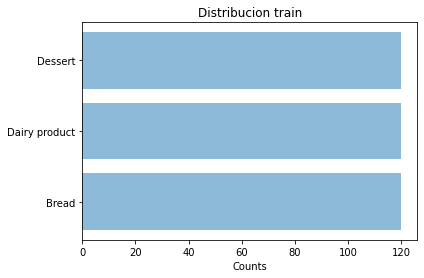

In [50]:
print("Datos de entrenamiento en: ", num_classes, "clases")
print([train_y.count(i) for i in range(num_classes)])
 
food_classes=[]
for name in sel_clases:
  food_classes+=[class_names[name]]
 
y_pos = np.arange(len(food_classes))
counts = [train_y.count(i) for i in range(num_classes)]
 
plt.barh(y_pos, counts, align='center', alpha=0.5)
plt.yticks(y_pos, food_classes)
plt.xlabel('Counts')
plt.title('Distribucion train')
 
plt.show()

Datos de test en:  3 clases
[40, 40, 40]


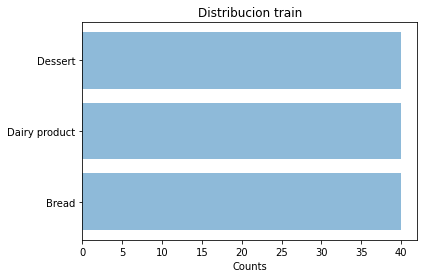

In [51]:
print("Datos de test en: ", num_classes, "clases")
print([test_y.count(i) for i in range(num_classes)])
 
food_classes=[]
for name in sel_clases:
  food_classes+=[class_names[name]]
 
y_pos = np.arange(len(food_classes))
counts = [test_y.count(i) for i in range(num_classes)]
 
plt.barh(y_pos, counts, align='center', alpha=0.5)
plt.yticks(y_pos, food_classes)
plt.xlabel('Counts')
plt.title('Distribucion train')
 
plt.show()

Datos de validacion en:  3 clases
[40, 40, 40]


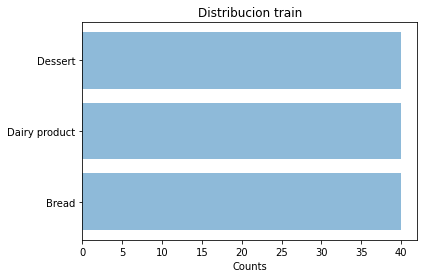

In [52]:
print("Datos de validacion en: ", num_classes, "clases")
print([val_y.count(i) for i in range(num_classes)])
 
food_classes=[]
for name in sel_clases:
  food_classes+=[class_names[name]]
 
y_pos = np.arange(len(food_classes))
counts = [val_y.count(i) for i in range(num_classes)]
 
plt.barh(y_pos, counts, align='center', alpha=0.5)
plt.yticks(y_pos, food_classes)
plt.xlabel('Counts')
plt.title('Distribucion train')
 
plt.show()

In [54]:
#Clase para mostrar imagenes
def show_imgs(X):
    plt.figure(figsize=(8, 8))
    
#   k = 0
    for i in range(0,3):
        for j in range(0,3):
            k = random.randint(0, len(X)-1)
            image = load_img(X[k], target_size=(224, 224))
            ax = plt.subplot2grid((4,4),(i,j))  
            ax.set_title('Clase: ' + str(train_y[k]) )     
            plt.imshow(image)            
#           k = k+1
    #Muestra
    plt.show()

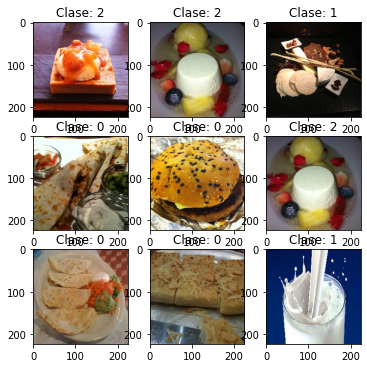

In [55]:
show_imgs(list_train)

In [56]:
def create_features(dataset):
 
    x_scratch = []

    k=0

    #Bucle sobre las imagenes
    for imagePath in dataset:
 
        #Se cargan las imagenes a tamaño 224
        image = load_img(imagePath, target_size=(224, 224))
        image = img_to_array(image)
 
        # preprocess the image by (1) expanding the dimensions and
        # (2) subtracting the mean RGB pixel intensity from the
        # ImageNet dataset
        image = np.expand_dims(image, axis=0)
        image = imagenet_utils.preprocess_input(image)
 
        # add the image to the batch
        x_scratch.append(image)

        k = k+1
        print('convertida:', k, ' de ', len(dataset))
 
    x = np.vstack(x_scratch)
    return x

In [57]:
train_x = create_features(list_train)
val_x   = create_features(list_val)
test_x  = create_features(list_test)
print(train_x.shape)
print(val_x.shape)
print(test_x.shape)

convertida: 1  de  360
convertida: 2  de  360
convertida: 3  de  360
convertida: 4  de  360
convertida: 5  de  360
convertida: 6  de  360
convertida: 7  de  360
convertida: 8  de  360
convertida: 9  de  360
convertida: 10  de  360
convertida: 11  de  360
convertida: 12  de  360
convertida: 13  de  360
convertida: 14  de  360
convertida: 15  de  360
convertida: 16  de  360
convertida: 17  de  360
convertida: 18  de  360
convertida: 19  de  360
convertida: 20  de  360
convertida: 21  de  360
convertida: 22  de  360
convertida: 23  de  360
convertida: 24  de  360
convertida: 25  de  360
convertida: 26  de  360
convertida: 27  de  360
convertida: 28  de  360
convertida: 29  de  360
convertida: 30  de  360
convertida: 31  de  360
convertida: 32  de  360
convertida: 33  de  360
convertida: 34  de  360
convertida: 35  de  360
convertida: 36  de  360
convertida: 37  de  360
convertida: 38  de  360
convertida: 39  de  360
convertida: 40  de  360
convertida: 41  de  360
convertida: 42  de  360
c

##3. Transfer Learning de VGG-16

In [58]:
# Creating a checkpointer
checkpointer = ModelCheckpoint(filepath='scratchmodel.best.hdf5',
                               verbose=1,save_best_only=True)
# load the VGG16 network
print("[INFO loading network...")
model_vgg = VGG16(weights="imagenet", include_top=False, input_shape=train_x.shape[1:])
model_vgg.summary()

[INFO loading network...
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 

In [59]:
model_transfer_full = Sequential()
model_transfer_full.add(model_vgg)
model_transfer_full.add(GlobalAveragePooling2D())
model_transfer_full.add(Dropout(0.2))
model_transfer_full.add(Dense(100, activation='relu'))
model_transfer_full.add(Dense(num_classes, activation='softmax'))
model_transfer_full.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_2   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               51300     
                                                                 
 dense_5 (Dense)             (None, 3)                 303       
                                                                 
Total params: 14,766,291
Trainable params: 14,766,291
Non-trainable params: 0
__________________________________________

In [60]:
opt = Adam(learning_rate=0.00001)
model_transfer_full.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
history = model_transfer_full.fit(train_x, y_train, batch_size=32, epochs=20,
          validation_data=(val_x, y_val), callbacks=[checkpointer],verbose=1, shuffle=True)

Epoch 1/20
12/12 [==============================] - ETA: 0s - loss: 3.3568 - accuracy: 0.3528
Epoch 1: val_loss improved from inf to 1.30057, saving model to scratchmodel.best.hdf5
12/12 [==============================] - 17s 1s/step - loss: 3.3568 - accuracy: 0.3528 - val_loss: 1.3006 - val_accuracy: 0.4917
Epoch 2/20
12/12 [==============================] - ETA: 0s - loss: 1.0470 - accuracy: 0.5611
Epoch 2: val_loss improved from 1.30057 to 1.02895, saving model to scratchmodel.best.hdf5
12/12 [==============================] - 11s 897ms/step - loss: 1.0470 - accuracy: 0.5611 - val_loss: 1.0289 - val_accuracy: 0.5083
Epoch 3/20
12/12 [==============================] - ETA: 0s - loss: 0.7741 - accuracy: 0.6694
Epoch 3: val_loss improved from 1.02895 to 0.89337, saving model to scratchmodel.best.hdf5
12/12 [==============================] - 11s 897ms/step - loss: 0.7741 - accuracy: 0.6694 - val_loss: 0.8934 - val_accuracy: 0.5917
Epoch 4/20
12/12 [==============================] - ETA:

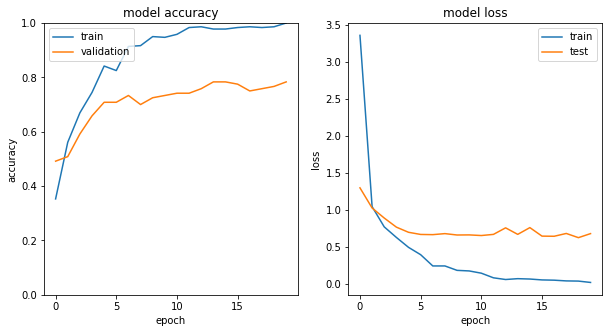

In [61]:
def plot_accuracy_loss(history):
    fig = plt.figure(figsize=(10,5))
 
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.ylim([0, 1])
 
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
 
plot_accuracy_loss(history)

In [94]:
preds = np.argmax(model_transfer_full.predict(test_x), axis=1)
print("Accuracy en Test: ", accuracy_score(test_y, preds))
print("Número de imagenes identificadas correctamente: ",
      accuracy_score(test_y, preds, normalize=False), "/", len(test_y),"\n")
confusion_matrix(test_y, preds, labels=range(0,num_classes))

Accuracy en Test:  0.85
Número de imagenes identificadas correctamente:  102 / 120 



array([[37,  1,  2],
       [ 1, 36,  3],
       [ 5,  6, 29]])

In [95]:
preds = np.argmax(model_transfer_full.predict(val_x), axis=1)
print("Accuracy en Validación: ", accuracy_score(val_y, preds))
print("Número de imagenes identificadas correctamente: ",
      accuracy_score(val_y, preds, normalize=False), "/", len(val_y),"\n")
confusion_matrix(val_y, preds, labels=range(0,num_classes))

Accuracy en Validación:  0.7833333333333333
Número de imagenes identificadas correctamente:  94 / 120 



array([[35,  0,  5],
       [ 2, 28, 10],
       [ 7,  2, 31]])

##Congelamos la mitad de VGG-16

In [63]:
# load the VGG16 network
print("[INFO] loading network...")
model_vgg = VGG16(weights="imagenet", include_top=False, input_shape=train_x.shape[1:])
 
# Freeze the layers except the last 9 layers
for layer in model_vgg.layers[:-9]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in model_vgg.layers:
    print(layer, layer.trainable)

[INFO] loading network...
<keras.engine.input_layer.InputLayer object at 0x7f9d91247810> False
<keras.layers.convolutional.Conv2D object at 0x7f9d91247f10> False
<keras.layers.convolutional.Conv2D object at 0x7f9d91363850> False
<keras.layers.pooling.MaxPooling2D object at 0x7f9e08772a10> False
<keras.layers.convolutional.Conv2D object at 0x7f9d91276f50> False
<keras.layers.convolutional.Conv2D object at 0x7f9d912c7e10> False
<keras.layers.pooling.MaxPooling2D object at 0x7f9d91244dd0> False
<keras.layers.convolutional.Conv2D object at 0x7f9d911e1dd0> False
<keras.layers.convolutional.Conv2D object at 0x7f9d9124e2d0> False
<keras.layers.convolutional.Conv2D object at 0x7f9d911e1cd0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f9d911d9b90> True
<keras.layers.convolutional.Conv2D object at 0x7f9d911ebfd0> True
<keras.layers.convolutional.Conv2D object at 0x7f9e08d6a990> True
<keras.layers.convolutional.Conv2D object at 0x7f9d911d9bd0> True
<keras.layers.pooling.MaxPooling2D obj

In [64]:
model_transfer_half = Sequential()
model_transfer_half.add(model_vgg)
model_transfer_half.add(GlobalAveragePooling2D())
model_transfer_half.add(Dropout(0.2))
model_transfer_half.add(Dense(100, activation='relu'))
model_transfer_half.add(Dense(num_classes, activation='softmax'))
model_transfer_half.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_3   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               51300     
                                                                 
 dense_7 (Dense)             (None, 3)                 303       
                                                                 
Total params: 14,766,291
Trainable params: 13,030,803
Non-trainable params: 1,735,488
__________________________________

In [65]:
opt = Adam(lr=0.00001)
model_transfer_half.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
history = model_transfer_half.fit(train_x, y_train, batch_size=32, epochs=20,
          validation_data=(val_x, y_val), callbacks=[checkpointer],verbose=1, shuffle=True)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


12/12 [==============================] - ETA: 0s - loss: 3.8147 - accuracy: 0.3750
Epoch 1: val_loss did not improve from 0.62882
12/12 [==============================] - 7s 512ms/step - loss: 3.8147 - accuracy: 0.3750 - val_loss: 1.8785 - val_accuracy: 0.4500
Epoch 2/20
12/12 [==============================] - ETA: 0s - loss: 1.3440 - accuracy: 0.5917
Epoch 2: val_loss did not improve from 0.62882
12/12 [==============================] - 6s 473ms/step - loss: 1.3440 - accuracy: 0.5917 - val_loss: 1.0864 - val_accuracy: 0.6000
Epoch 3/20
12/12 [==============================] - ETA: 0s - loss: 0.7774 - accuracy: 0.6917
Epoch 3: val_loss did not improve from 0.62882
12/12 [==============================] - 6s 474ms/step - loss: 0.7774 - accuracy: 0.6917 - val_loss: 0.9831 - val_accuracy: 0.6417
Epoch 4/20
12/12 [==============================] - ETA: 0s - loss: 0.6341 - accuracy: 0.7361
Epoch 4: val_loss did not improve from 0.62882
12/12 [==============================] - 6s 473ms/step

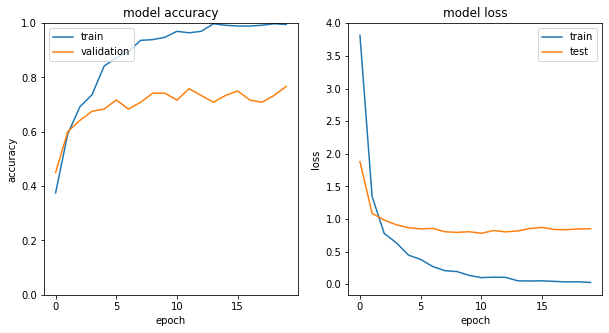

In [66]:
plot_accuracy_loss(history)

In [96]:
preds = np.argmax(model_transfer_half.predict(test_x), axis=1)
print("Accuracy en Test: ", accuracy_score(test_y, preds))
print("Número de imagenes identificadas correctamente: ",
      accuracy_score(test_y, preds, normalize=False), "/", len(test_y),"\n")
confusion_matrix(test_y, preds, labels=range(0,num_classes))

Accuracy en Test:  0.7916666666666666
Número de imagenes identificadas correctamente:  95 / 120 



array([[35,  2,  3],
       [ 1, 30,  9],
       [ 3,  7, 30]])

In [97]:
preds = np.argmax(model_transfer_half.predict(val_x), axis=1)
print("Accuracy en Validación: ", accuracy_score(val_y, preds))
print("Número de imagenes identificadas correctamente: ",
      accuracy_score(val_y, preds, normalize=False), "/", len(val_y),"\n")
confusion_matrix(val_y, preds, labels=range(0,num_classes))

Accuracy en Validación:  0.7666666666666667
Número de imagenes identificadas correctamente:  92 / 120 



array([[31,  1,  8],
       [ 2, 27, 11],
       [ 4,  2, 34]])

##Resnet50

In [72]:
# load the Resnet50 network
print("[INFO loading network...")
model_resnet = ResNet50(weights="imagenet", include_top=False, input_shape=train_x.shape[1:])
model_resnet.summary()

[INFO loading network...
94781440/94765736 [==============================] - 2s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_5[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
 

In [74]:
# Check the trainable status of the individual layers
for layer in model_resnet.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f9d9032a450> True
<keras.layers.convolutional.ZeroPadding2D object at 0x7f9d9032c550> True
<keras.layers.convolutional.Conv2D object at 0x7f9d9032c790> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f9d90330890> True
<keras.layers.core.activation.Activation object at 0x7f9d91659e10> True
<keras.layers.convolutional.ZeroPadding2D object at 0x7f9d9046a090> True
<keras.layers.pooling.MaxPooling2D object at 0x7f9d903b4710> True
<keras.layers.convolutional.Conv2D object at 0x7f9d904e3090> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f9d9050c650> True
<keras.layers.core.activation.Activation object at 0x7f9d904cbcd0> True
<keras.layers.convolutional.Conv2D object at 0x7f9d905f2d50> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f9d9049b210> True
<keras.layers.core.activation.Activation object at 0x7f9d903989d0> True
<keras.layer

In [75]:
model_transfer_resnet = Sequential()
model_transfer_resnet.add(model_resnet)
model_transfer_resnet.add(GlobalAveragePooling2D())
model_transfer_resnet.add(Dropout(0.2))
model_transfer_resnet.add(Dense(100, activation='relu'))
model_transfer_resnet.add(Dense(num_classes, activation='softmax'))
model_transfer_resnet.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_4   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_4 (Dropout)         (None, 2048)              0         
                                                                 
 dense_8 (Dense)             (None, 100)               204900    
                                                                 
 dense_9 (Dense)             (None, 3)                 303       
                                                                 
Total params: 23,792,915
Trainable params: 23,739,795
Non-trainable params: 53,120
_____________________________________

In [76]:
opt = Adam(lr=0.00001)
model_transfer_resnet.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

history = model_transfer_resnet.fit(train_x, y_train, batch_size=32, epochs=20,
          validation_data=(val_x, y_val), callbacks=[checkpointer],verbose=1, shuffle=True)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
12/12 [==============================] - ETA: 0s - loss: 1.5216 - accuracy: 0.3667
Epoch 1: val_loss did not improve from 0.62882
12/12 [==============================] - 27s 987ms/step - loss: 1.5216 - accuracy: 0.3667 - val_loss: 1.3319 - val_accuracy: 0.3833
Epoch 2/20
12/12 [==============================] - ETA: 0s - loss: 0.9762 - accuracy: 0.5528
Epoch 2: val_loss did not improve from 0.62882
12/12 [==============================] - 8s 659ms/step - loss: 0.9762 - accuracy: 0.5528 - val_loss: 1.0512 - val_accuracy: 0.5000
Epoch 3/20
12/12 [==============================] - ETA: 0s - loss: 0.6866 - accuracy: 0.7222
Epoch 3: val_loss did not improve from 0.62882
12/12 [==============================] - 8s 660ms/step - loss: 0.6866 - accuracy: 0.7222 - val_loss: 0.9132 - val_accuracy: 0.5917
Epoch 4/20
12/12 [==============================] - ETA: 0s - loss: 0.5244 - accuracy: 0.8306
Epoch 4: val_loss did not improve from 0.62882
12/12 [==============================] - 8

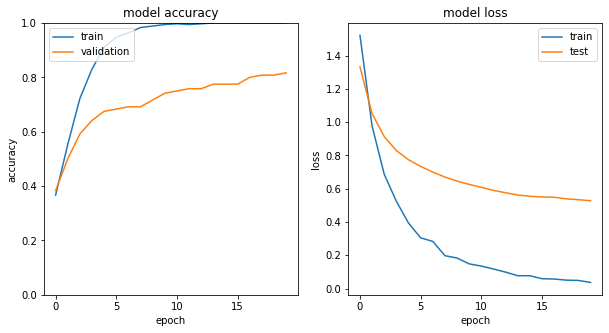

In [78]:
plot_accuracy_loss(history)

In [98]:
preds = np.argmax(model_transfer_resnet.predict(test_x), axis=1)
print("Accuracy en Test: ", accuracy_score(test_y, preds))
print("Número de imagenes identificadas correctamente: ",
      accuracy_score(test_y, preds, normalize=False), "/", len(test_y),"\n")
confusion_matrix(test_y, preds, labels=range(0,num_classes))

Accuracy en Test:  0.7916666666666666
Número de imagenes identificadas correctamente:  95 / 120 



array([[36,  2,  2],
       [ 2, 33,  5],
       [ 8,  6, 26]])

In [99]:
preds = np.argmax(model_transfer_resnet.predict(val_x), axis=1)
print("Accuracy en Validación: ", accuracy_score(val_y, preds))
print("Número de imagenes identificadas correctamente: ",
      accuracy_score(val_y, preds, normalize=False), "/", len(val_y),"\n")
confusion_matrix(val_y, preds, labels=range(0,num_classes))

Accuracy en Validación:  0.8
Número de imagenes identificadas correctamente:  96 / 120 



array([[36,  0,  4],
       [ 2, 28, 10],
       [ 3,  5, 32]])

## Resnet50 Congelamos excepto las últimas 6 capas

In [81]:
# Freeze the layers except the last 6 layers
for layer in model_resnet.layers[:-6]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in model_resnet.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f9d9032a450> False
<keras.layers.convolutional.ZeroPadding2D object at 0x7f9d9032c550> False
<keras.layers.convolutional.Conv2D object at 0x7f9d9032c790> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f9d90330890> False
<keras.layers.core.activation.Activation object at 0x7f9d91659e10> False
<keras.layers.convolutional.ZeroPadding2D object at 0x7f9d9046a090> False
<keras.layers.pooling.MaxPooling2D object at 0x7f9d903b4710> False
<keras.layers.convolutional.Conv2D object at 0x7f9d904e3090> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f9d9050c650> False
<keras.layers.core.activation.Activation object at 0x7f9d904cbcd0> False
<keras.layers.convolutional.Conv2D object at 0x7f9d905f2d50> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f9d9049b210> False
<keras.layers.core.activation.Activation object at 0x7f9d903989d0> False

In [82]:
model_transfer_half_resnet = Sequential()
model_transfer_half_resnet.add(model_resnet)
model_transfer_half_resnet.add(GlobalAveragePooling2D())
model_transfer_half_resnet.add(Dropout(0.2))
model_transfer_half_resnet.add(Dense(100, activation='relu'))
model_transfer_half_resnet.add(Dense(num_classes, activation='softmax'))
model_transfer_half_resnet.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_5   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_5 (Dropout)         (None, 2048)              0         
                                                                 
 dense_10 (Dense)            (None, 100)               204900    
                                                                 
 dense_11 (Dense)            (None, 3)                 303       
                                                                 
Total params: 23,792,915
Trainable params: 1,260,947
Non-trainable params: 22,531,968
__________________________________

In [83]:
opt = Adam(lr=0.00001)
model_transfer_half_resnet.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

history = model_transfer_half_resnet.fit(train_x, y_train, batch_size=32, epochs=20,
          validation_data=(val_x, y_val), callbacks=[checkpointer],verbose=1, shuffle=True)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
12/12 [==============================] - ETA: 0s - loss: 1.3082 - accuracy: 0.3583
Epoch 1: val_loss did not improve from 0.52783
12/12 [==============================] - 9s 381ms/step - loss: 1.3082 - accuracy: 0.3583 - val_loss: 1.2081 - val_accuracy: 0.3583
Epoch 2/20
12/12 [==============================] - ETA: 0s - loss: 1.1581 - accuracy: 0.4361
Epoch 2: val_loss did not improve from 0.52783
12/12 [==============================] - 3s 259ms/step - loss: 1.1581 - accuracy: 0.4361 - val_loss: 1.1141 - val_accuracy: 0.3917
Epoch 3/20
12/12 [==============================] - ETA: 0s - loss: 1.0016 - accuracy: 0.5111
Epoch 3: val_loss did not improve from 0.52783
12/12 [==============================] - 3s 256ms/step - loss: 1.0016 - accuracy: 0.5111 - val_loss: 1.0390 - val_accuracy: 0.4583
Epoch 4/20
12/12 [==============================] - ETA: 0s - loss: 0.9140 - accuracy: 0.5722
Epoch 4: val_loss did not improve from 0.52783
12/12 [==============================] - 3s

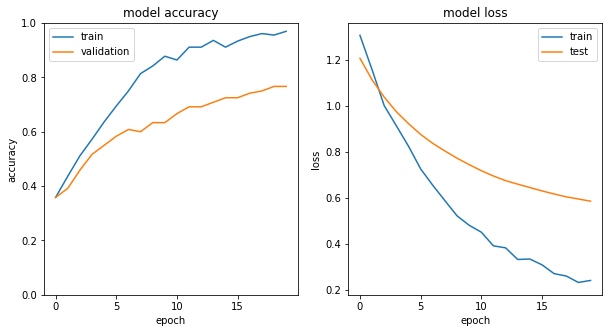

In [84]:
plot_accuracy_loss(history)

In [100]:
preds = np.argmax(model_transfer_half_resnet.predict(test_x), axis=1)
print("Accuracy en Test: ", accuracy_score(test_y, preds))
print("Número de imagenes identificadas correctamente: ",
      accuracy_score(test_y, preds, normalize=False), "/", len(test_y),"\n")
confusion_matrix(test_y, preds, labels=range(0,num_classes))

Accuracy en Test:  0.7916666666666666
Número de imagenes identificadas correctamente:  95 / 120 



array([[36,  2,  2],
       [ 2, 34,  4],
       [ 5, 10, 25]])

In [101]:
preds = np.argmax(model_transfer_half_resnet.predict(val_x), axis=1)
print("Accuracy en Validación: ", accuracy_score(val_y, preds))
print("Número de imagenes identificadas correctamente: ",
      accuracy_score(val_y, preds, normalize=False), "/", len(val_y),"\n")
confusion_matrix(val_y, preds, labels=range(0,num_classes))

Accuracy en Validación:  0.7666666666666667
Número de imagenes identificadas correctamente:  92 / 120 



array([[34,  2,  4],
       [ 3, 31,  6],
       [ 6,  7, 27]])

##Comprobaciones Test

Ground truth:  0   Bread
Predict:       0   Bread


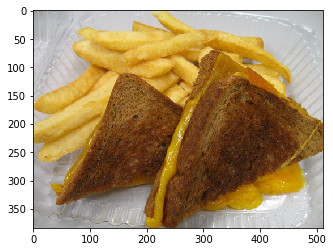

In [102]:
id=52

image = img.imread(list_train[id])
plt.imshow(image[:,:,:], cmap='gray', vmin = 0, vmax = 255,interpolation='none')
print("Ground truth: ", y_train[id].argmax(), " ", food_classes[y_train[id].argmax()])
#plt.imshow(train_x[id])

p = model_transfer_half_resnet.predict(np.expand_dims(train_x[id], axis=0))
print("Predict:      ", p.argmax(), " ", food_classes[p.argmax()])

##Comprobaciones Validacion

Ground truth:  1   Dairy product
Predict:       1   Dairy product


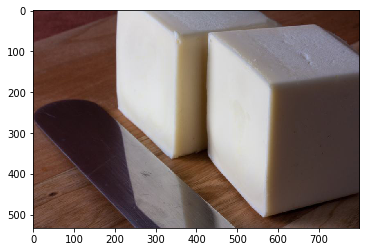

In [103]:
id=49

image = img.imread(list_val[id])
plt.imshow(image[:,:,:], cmap='gray', vmin = 0, vmax = 255,interpolation='none')
print("Ground truth: ", y_val[id].argmax(), " ", food_classes[y_val[id].argmax()])

p = model_transfer_half_resnet.predict(np.expand_dims(val_x[id], axis=0))
print("Predict:      ", p.argmax(), " ", food_classes[p.argmax()])

##Comprobaciones Imagenes 'Mias'

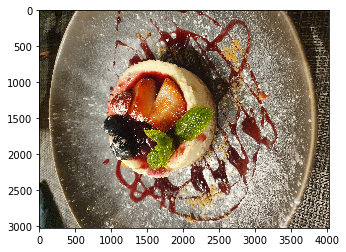

In [117]:
img_mia = '/content/drive/MyDrive/IA3/Datasets/mi_food/20201213_221037.jpg'
image = img.imread(img_mia)
plt.imshow(image[:,:,:], cmap='gray', vmin = 0, vmax = 255,interpolation='none')

In [119]:
mia_x = create_features([img_mia])

convertida: 1  de  1


In [123]:
print("Ground truth: ", 2, " ", food_classes[2])

p = model_transfer_half_resnet.predict(np.expand_dims(mia_x[0], axis=0))
print("Predict:      ", p.argmax(), " ", food_classes[p.argmax()], p.max())

Ground truth:  2   Dessert
Predict:       2   Dessert 0.8890737
